In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
bp = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Decision Tree\Patient_with_abnormal_bloodpressure.csv')

In [10]:
bp.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [11]:
bp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [12]:
bp.shape

(2000, 15)

In [13]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [14]:
bp.Genetic_Pedigree_Coefficient.value_counts()

0.86    32
0.13    30
0.63    28
0.56    27
0.17    27
        ..
0.78    11
0.91    11
0.16    10
0.15     9
0.65     9
Name: Genetic_Pedigree_Coefficient, Length: 101, dtype: int64

In [15]:
bp.alcohol_consumption_per_day.value_counts()

253.0    11
401.0    10
302.0    10
144.0    10
485.0     9
         ..
21.0      1
406.0     1
346.0     1
244.0     1
326.0     1
Name: alcohol_consumption_per_day, Length: 488, dtype: int64

In [16]:
bp.Pregnancy.value_counts()

0.0    243
1.0    199
Name: Pregnancy, dtype: int64

In [17]:
bp.Genetic_Pedigree_Coefficient.fillna(bp.Genetic_Pedigree_Coefficient.mean(), inplace= True)
bp.alcohol_consumption_per_day.fillna(bp.alcohol_consumption_per_day.mean(), inplace= True)

In [18]:
bp1 = bp

In [19]:
bp = bp.drop(['Patient_Number', 'Pregnancy'], axis=1)

In [20]:
bp.shape

(2000, 13)

In [21]:
bp1.shape

(2000, 15)

In [22]:
bp.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,0,45961,48071,251.008532,2,1,1
1,0,9.75,0.23,54,33,1,0,26106,25333,205.000000,3,0,0
2,1,10.79,0.91,70,49,0,0,9995,29465,67.000000,2,1,0
3,0,11.00,0.43,71,50,0,0,10635,7439,242.000000,1,1,0
4,1,14.17,0.83,52,19,0,0,15619,49644,397.000000,2,0,0


In [23]:
bp.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [24]:
bp_train, bp_test = train_test_split(bp, test_size= .2)

In [26]:
bp_train_x = bp_train.iloc[:, 1::]
bp_train_y = bp_train.iloc[:, 0]

bp_test_x = bp_test.iloc[:, 1::]
bp_test_y = bp_test.iloc[:, 0]

In [28]:
logreg = LogisticRegression()

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(bp_train_x, bp_train_y)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [31]:
logreg.fit(bp_train_x, bp_train_y)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred_log = logreg.predict(bp_test_x)

In [33]:
pred_dt = dt.predict(bp_test_x)

In [34]:
tab_log = confusion_matrix(bp_test_y, pred_log)
tab_log

array([[113,  92],
       [ 81, 114]], dtype=int64)

In [35]:
tab_dt = confusion_matrix(bp_test_y, pred_dt)
tab_dt

array([[177,  28],
       [ 37, 158]], dtype=int64)

In [36]:
Accuracy = accuracy_score(bp_test_y, pred_log)
Precision = precision_score(bp_test_y, pred_log)
Recall = recall_score(bp_test_y, pred_log)
F1_score  = f1_score(bp_test_y, pred_log)

In [39]:
print('Accuracy -- >' , Accuracy*100)
print('Precision -- >' , Precision*100)
print('Recall -- >' , Recall*100)
print('F1_score -- >' , F1_score*100)

# for Logistic model

Accuracy -- > 56.75
Precision -- > 55.33980582524271
Recall -- > 58.46153846153847
F1_score -- > 56.85785536159602


In [40]:
Accuracy = accuracy_score(bp_test_y, pred_dt)
Precision = precision_score(bp_test_y, pred_dt)
Recall = recall_score(bp_test_y, pred_dt)
F1_score  = f1_score(bp_test_y, pred_dt)

In [41]:
print('Accuracy -- >' , Accuracy*100)
print('Precision -- >' , Precision*100)
print('Recall -- >' , Recall*100)
print('F1_score -- >' , F1_score*100)

# for Decision8 Tree model, GINI

Accuracy -- > 83.75
Precision -- > 84.94623655913979
Recall -- > 81.02564102564102
F1_score -- > 82.93963254593176


In [78]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 10)

In [79]:
dt.fit(bp_train_x, bp_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [80]:
pred_dt = dt.predict(bp_test_x)

In [81]:
tab_dt = confusion_matrix(bp_test_y, pred_dt)
tab_dt

array([[182,  23],
       [ 29, 166]], dtype=int64)

In [82]:
Accuracy = accuracy_score(bp_test_y, pred_dt)
Precision = precision_score(bp_test_y, pred_dt)
Recall = recall_score(bp_test_y, pred_dt)
F1_score  = f1_score(bp_test_y, pred_dt)

In [83]:
print('Accuracy -- >' , Accuracy*100)
print('Precision -- >' , Precision*100)
print('Recall -- >' , Recall*100)
print('F1_score -- >' , F1_score*100)

# for Decision Tree model, Entropy

Accuracy -- > 87.0
Precision -- > 87.83068783068782
Recall -- > 85.12820512820512
F1_score -- > 86.45833333333333


In [84]:
# We get better output from Entropy and now we will set the max depth

# So max_depth = 10 gives the best model with entropy 

In [85]:
fea_imp = pd.DataFrame({'Feature': bp_train_x.columns, 'Importance': dt.feature_importances_})
fea_imp.sort_values('Importance', ascending= False)

,Feature,Importance
0,Level_of_Hemoglobin,0.311404
1,Genetic_Pedigree_Coefficient,0.282970
10,Chronic_kidney_disease,0.159110
11,Adrenal_and_thyroid_disorders,0.064067
8,alcohol_consumption_per_day,0.034952
6,Physical_activity,0.034750
7,salt_content_in_the_diet,0.028780
3,BMI,0.026004
2,Age,0.023068
9,Level_of_Stress,0.020126


In [86]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
import pydotplus
import matplotlib.pyplot as plt
from six import StringIO

In [102]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6)

In [103]:
dt.fit(bp_train_x, bp_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [104]:
pred_dt = dt.predict(bp_test_x)

In [105]:
tab_dt = confusion_matrix(bp_test_y, pred_dt)
tab_dt

array([[189,  16],
       [ 33, 162]], dtype=int64)

In [106]:
Accuracy = accuracy_score(bp_test_y, pred_dt)
Precision = precision_score(bp_test_y, pred_dt)
Recall = recall_score(bp_test_y, pred_dt)
F1_score  = f1_score(bp_test_y, pred_dt)

In [107]:
print('Accuracy -- >' , Accuracy*100)
print('Precision -- >' , Precision*100)
print('Recall -- >' , Recall*100)
print('F1_score -- >' , F1_score*100)

# for Decision Tree model, Entropy

Accuracy -- > 87.75
Precision -- > 91.01123595505618
Recall -- > 83.07692307692308
F1_score -- > 86.86327077747991


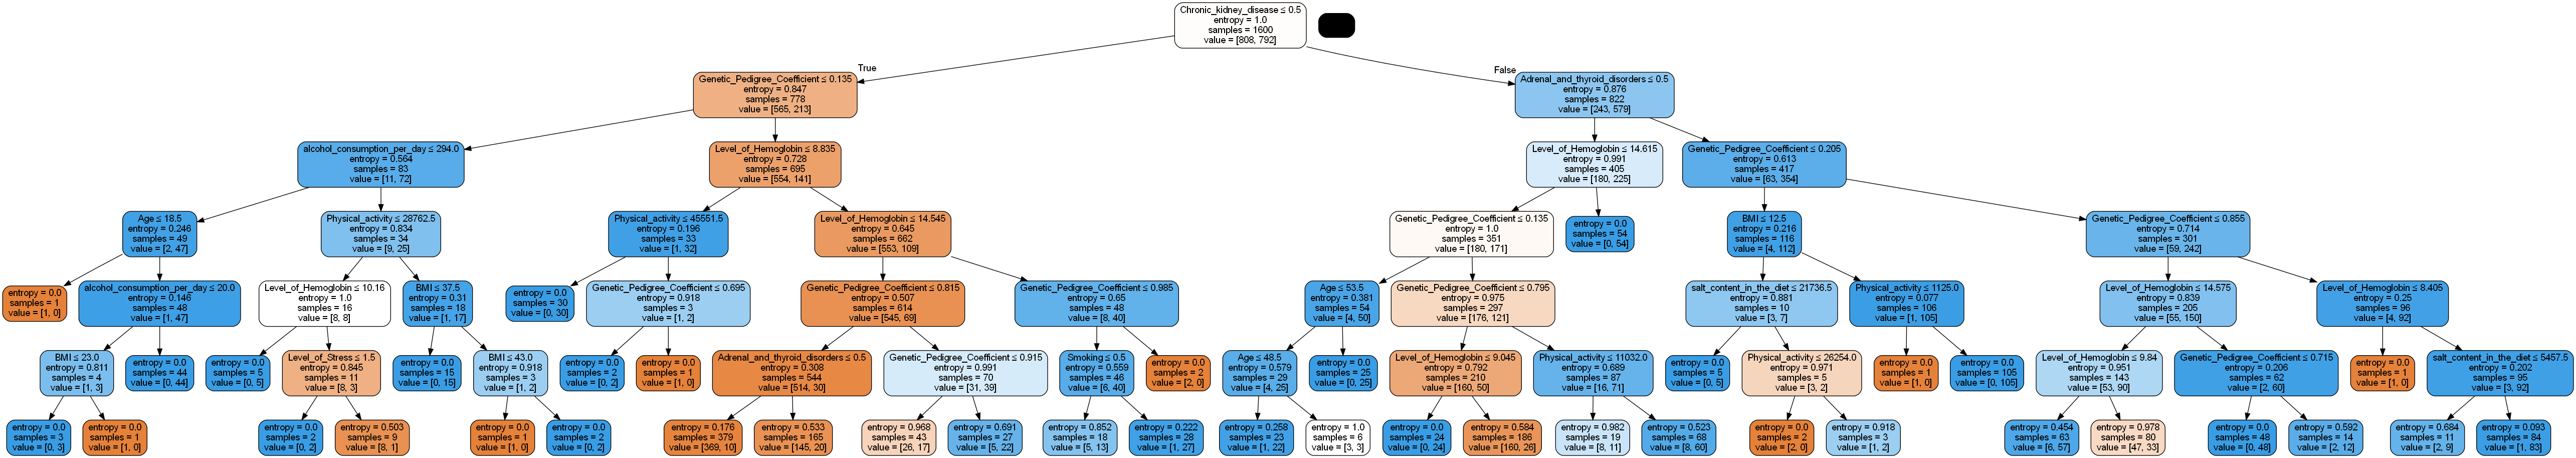

<Figure size 864x864 with 0 Axes>

In [108]:
dot_data = StringIO()
fig = plt.figure(figsize = (12,12))

export_graphviz(dt, out_file= dot_data,
               filled = True, rounded = True,
               special_characters = True, feature_names = bp_train_x.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [109]:
fea_imp = pd.DataFrame({'Feature': bp_train_x.columns, 'Importance': dt.feature_importances_})
fea_imp.sort_values('Importance', ascending= False)

,Feature,Importance
1,Genetic_Pedigree_Coefficient,0.324414
0,Level_of_Hemoglobin,0.312953
10,Chronic_kidney_disease,0.210350
11,Adrenal_and_thyroid_disorders,0.072351
6,Physical_activity,0.025179
3,BMI,0.016120
2,Age,0.013015
8,alcohol_consumption_per_day,0.009709
7,salt_content_in_the_diet,0.007441
9,Level_of_Stress,0.004538


In [110]:
cn = ['1','2']

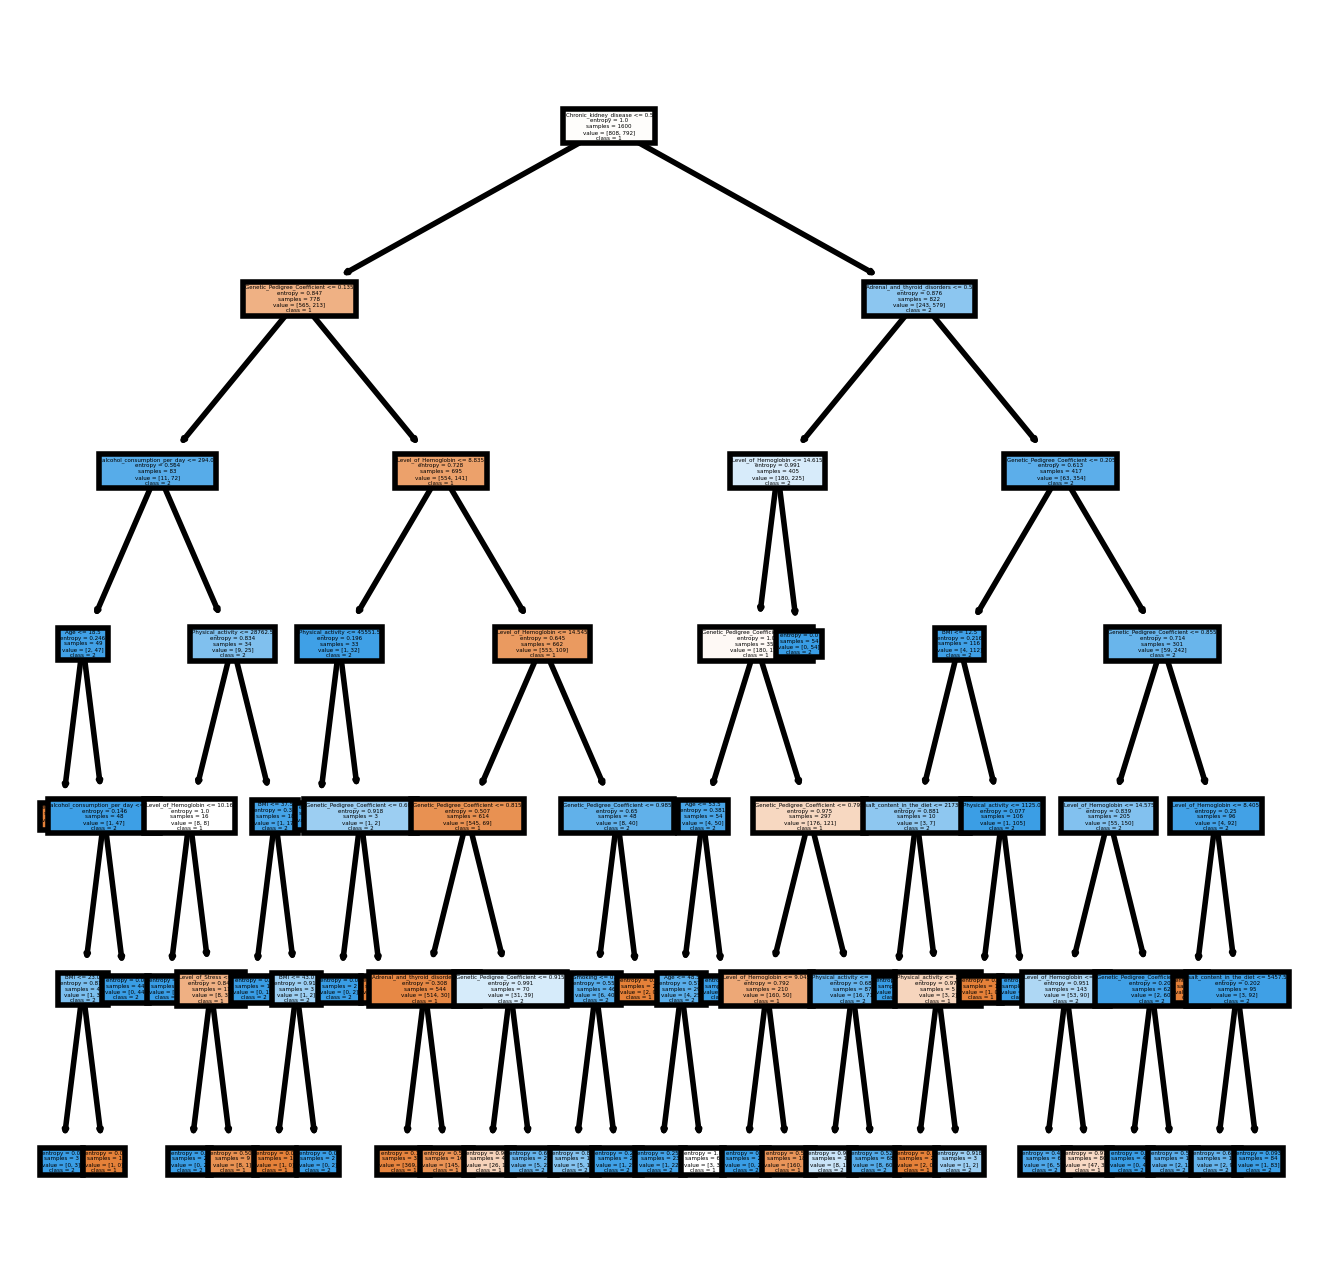

In [111]:
from sklearn import tree
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize= (4,4), dpi = 400)

tree.plot_tree(dt, feature_names= bp_train_x.columns,
              class_names= cn, filled= True);